# FastPitch Singlish

Text to Melspectrogram using FastPitch.

<div class="alert alert-info">

This tutorial is available as an IPython notebook at [malaya-speech/example/tts-fastpitch-singlish](https://github.com/huseinzol05/malaya-speech/tree/master/example/tts-fastpitch-singlish).
    
</div>

<div class="alert alert-warning">

This module is not language independent, so it not save to use on different languages. Pretrained models trained on hyperlocal languages.
    
</div>

<div class="alert alert-warning">

This is an application of malaya-speech Pipeline, read more about malaya-speech Pipeline at [malaya-speech/example/pipeline](https://github.com/huseinzol05/malaya-speech/tree/master/example/pipeline).
    
</div>

In [1]:
import malaya_speech
import numpy as np
from malaya_speech import Pipeline
import matplotlib.pyplot as plt
import IPython.display as ipd

### FastPitch description

1. Malaya-speech FastPitch will generate melspectrogram with feature size 80.
2. Use Malaya-speech vocoder to convert melspectrogram to waveform.
3. Cannot generate more than melspectrogram longer than 2000 timestamp, it will throw an error. Make sure the texts are not too long.

### List available FastPitch

In [2]:
malaya_speech.tts.available_fastpitch()

INFO:root:`husein`, `haqkiem` and `female-singlish` combined loss from training set


,Size (MB),Quantized Size (MB),Combined loss
haqkiem,125.0,31.7,0.5186
female-singlish,125.0,31.7,0.4083


### Load FastPitch model

Read more about Tacotron2 model at https://malaya-speech.readthedocs.io/en/latest/tts-fastpitch-model.html

In [3]:
fastpitch = malaya_speech.tts.fastpitch(model = 'female-singlish')
quantized_fastpitch = malaya_speech.tts.fastpitch(model = 'female-singlish', quantized = True)

INFO:root:running Users/huseinzolkepli/Malaya_Speech/tts/fastpitch-female-singlish using device /device:CPU:0
INFO:root:running Users/huseinzolkepli/Malaya_Speech/tts/fastpitch-female-singlish/quantized using device /device:CPU:0


### Predict FastPitch

```python
def predict(
    self,
    string,
    speed_ratio: float = 1.0,
    pitch_ratio: float = 1.0,
    pitch_addition: float = 0.0,
    **kwargs,
):
    """
    Change string to Mel.

    Parameters
    ----------
    string: str
    speed_ratio: float, optional (default=1.0)
        Increase this variable will increase time voice generated.
    pitch_ratio: float, optional (default=1.0)
        pitch = pitch * pitch_ratio, amplify existing pitch contour.
    pitch_addition: float, optional (default=0.0)
        pitch = pitch + pitch_addition, change pitch contour.

    Returns
    -------
    result: Dict[string, decoder-output, postnet-output, pitch-output, universal-output]
    """
```

It only able to predict 1 text for single feed-forward.

In [4]:
string1 = 'PETALING JAYA: Former prime minister Najib Razak has criticised the Inland Revenue Board’s (LHDN) move to serve him a bankruptcy notice, which his legal team had earlier called a political ploy.'

In [5]:
%%time

r_fastpitch = fastpitch.predict(string1)

CPU times: user 3.94 s, sys: 1.84 s, total: 5.78 s
Wall time: 4.75 s


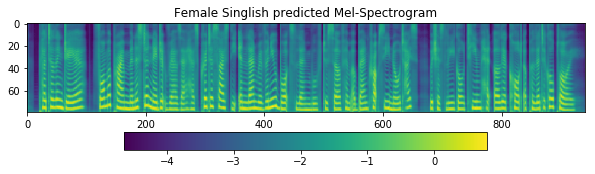

In [6]:
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(311)
ax1.set_title('Female Singlish predicted Mel-Spectrogram')
im = ax1.imshow(np.rot90(r_fastpitch['postnet-output']), aspect='auto', interpolation='none')
fig.colorbar(mappable=im, shrink=0.65, orientation='horizontal', ax=ax1)
plt.show()

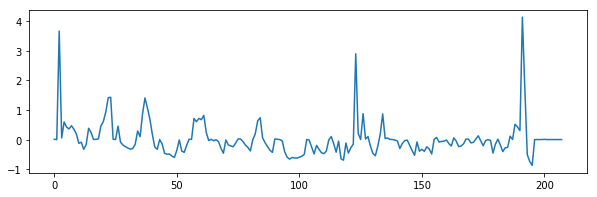

In [7]:
fig = plt.figure(figsize=(10, 3))
original_pitch = r_fastpitch['pitch-output']
plt.plot(original_pitch)

### Load Vocoder model

There are 2 ways to synthesize melspectrogram output from TTS models,

1. If you are going to use individual speaker vocoder, make sure the speakers are the same If use female tacotron2, need to use female MelGAN also. Use `postnet-output` from TTS model. Read more at https://malaya-speech.readthedocs.io/en/latest/load-vocoder.html
2. If you are going to use universal MelGAN, use `universal-output` from TTS model. Read more at https://malaya-speech.readthedocs.io/en/latest/load-universal-melgan.html

We prefer individual speaker vocoder, size only 17MB and faster than universal vocoder.

In [8]:
vocoder = malaya_speech.vocoder.melgan(model = 'female-singlish')

INFO:root:running vocoder-melgan/female-singlish using device /device:CPU:0


In [9]:
y_ = vocoder(r_fastpitch['postnet-output'])
ipd.Audio(y_, rate = 22050)

### Playing around with pitch ratio and pitch addition

In [10]:
r_fastpitch = fastpitch.predict(string1, pitch_addition = 0.5, pitch_ratio = 1.5)

In [11]:
y_ = vocoder(r_fastpitch['postnet-output'])
ipd.Audio(y_, rate = 22050)

In [12]:
r_fastpitch = fastpitch.predict(string1, pitch_addition = -0.4)

In [13]:
y_ = vocoder(r_fastpitch['postnet-output'])
ipd.Audio(y_, rate = 22050)